In [138]:
import numpy as np
import plotly.express as px

In [139]:
x = [1,2,3,4,5]
y = [12,25,34,44,56]

In [140]:
X = np.array(x)
Y = np.array(y)

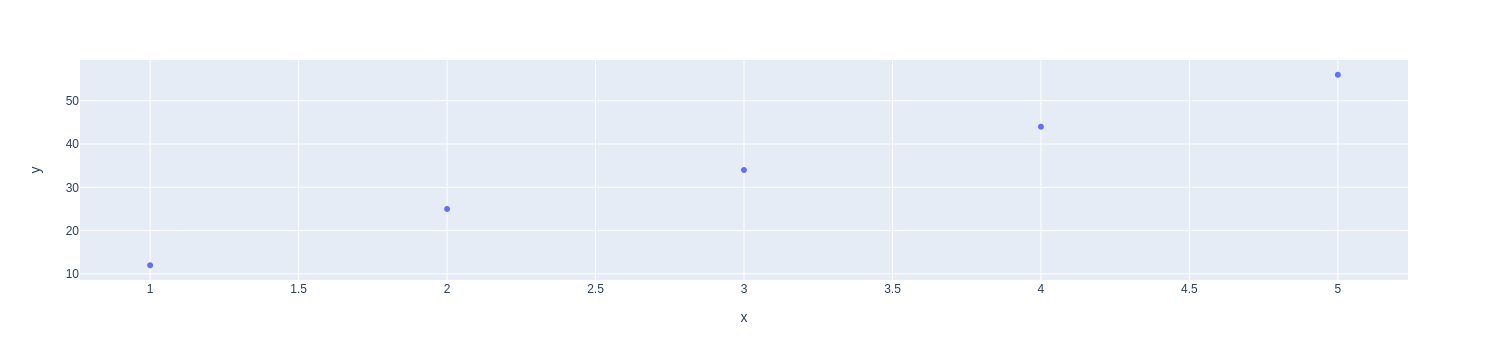

In [141]:
fig = px.scatter(x=X, y=Y)
fig.show()

In [133]:
class LinearRegression():
    def __init__(self, x=[],y=[],theta=np.random.rand(), b=np.random.rand()):
        self.theta = theta
        self.b = b
        self.x = x
        self.y = y
        self.early_coof = 0.01
    
    def __get_cost_function(self):
        y_predict = self.predict(self.x)
        error = np.sum((y_predict - self.y)**2)
        cost_function = ( 1 / len(self.x) ) * 0.5 * error
        return cost_function
    
    def __get_derived_cost_function_by_theta(self):
        coof = ( 1 / len(self.x) )
        y_predict = (self.predict(self.x) - self.y).T
        return coof * self.x.dot(y_predict)
    
    def __get_derived_cost_function_by_b(self):
        coof = ( 1 / len(self.x) )
        y_predict = self.predict(self.x)
        error = np.sum(y_predict - self.y)
        return coof * error
        
    def __get_error(self):
        y_predict = self.predict(self.x)
        error = np.sum((y_predict - self.y)**2)
        return error
    
    def __update_factors(self, learning_rate):
        theta_changes = learning_rate * self.__get_derived_cost_function_by_theta()
        b_changes = learning_rate * self.__get_derived_cost_function_by_b() 
        self.theta -= theta_changes
        self.b -=  b_changes
    
    def __is_break(self, early_stop):
        if early_stop and self.__get_error() <= self.early_coof:
            return True
        return False
    
    def __print_info(self, step, verbose):
        if verbose:
            print(f"Step #{step}")
            print(f"Cost function = {self.__get_cost_function()}")
            print(f"Theta = {self.theta}")
            print(f"b = {self.b}")
            print(f"Error = {self.__get_error()}")
            
    def __clear_data(self):
        self.x = []
        self.y = []
        
    def fit(self, x,y, learning_rate=0.001, steps=100, verbose=True, early_stop=True):
        self.x = np.array(x)
        self.y = np.array(y)
        
        for step in range(steps):
            self.__update_factors(learning_rate=learning_rate)
            is_break = self.__is_break(early_stop)
            self.__print_info(step, verbose)
            
            if is_break:
                break
        self.__clear_data()
        
    def predict(self, x):
        x = np.array(x)
        return self.theta*x+self.b


In [134]:
lr = LinearRegression()

In [135]:
lr.fit(X,Y,verbose=False,steps=10000)

In [137]:
lr.predict(10)

108.893586432647